In [1]:
# создаем файл для разметки букетов как таковых
import csv

# Данные для записи
data = [
    ['filename', 'заказчик', 'товар', 'категория', 'цена', 'цвет', 'обертка', 'оформление', 'сухоцвет'],
]

# Запись данных в CSV файл
with open('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_labels.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)


In [8]:
import os
import pandas as pd

# Путь к директории с изображениями
directory = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2'

# Получение списка всех файлов в директории
filenames = os.listdir(directory)

# Создание DataFrame
df = pd.DataFrame(filenames, columns=['filename'])

# Сохранение DataFrame в CSV файл
df.to_csv('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_labels.csv', index=False)


№	Оформлен	Заказчик	Пол	Тип заказа	Время доставки	Стоимость	Статус заказа	Товар	Название товара	Название категории	Ссылка на изображение	Стоимость товара	Количество	

In [18]:
# Маркетинговый анализ. Сколько покупок по категориям.
num_categories = bouquets['Название категории'].nunique()
print(f"Количество категорий: {num_categories}")


Количество категорий: 25


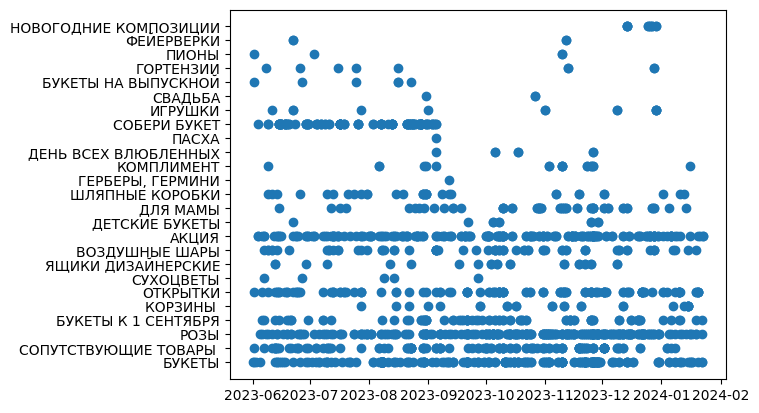

In [20]:
bouquets['Оформлен'] = pd.to_datetime(bouquets['Оформлен'], format='%d.%m.%Y')
plt.scatter(bouquets['Оформлен'], bouquets['Название категории'])
plt.show()


По скаттеру видно, что помимо стандартной категории Букеты популярны:
Розы, сопутствующие товары, открытки, букеты к 1 сентября (продаются весь период датасета),акции, воздушные шары, букеты для мамы (по убывающей).
Были популярны собери букет, но полностью прекратились к сентябрю 2023. Из цветов менее всего популярны букеты для свадьбы, детские букеты, а также герберы-гермини, пионы и гортензии. Из букетов к праздникам более всего популярны к 1 сентября, менее всего популярны букеты к пасхе


In [21]:
gender_category = bouquets.groupby(['Название категории', 'Пол']).size().unstack()
print(gender_category)
# мужчины покупают розы, букеты к 1 сенттября (потому что дешевые) и акции
# у женщин выраженных предпочтений нет, также популяирны розы, собери букет.
# Сопутствующие товары популярны открытки

Пол                    Женский  Мужской
Название категории                     
АКЦИЯ                     40.0    171.0
БУКЕТЫ                   152.0    167.0
БУКЕТЫ К 1 СЕНТЯБРЯ       21.0     66.0
БУКЕТЫ НА ВЫПУСКНОЙ        NaN      6.0
ВОЗДУШНЫЕ ШАРЫ            22.0     47.0
ГЕРБЕРЫ, ГЕРМИНИ           NaN      1.0
ГОРТЕНЗИИ                  4.0      5.0
ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ       NaN      7.0
ДЕТСКИЕ БУКЕТЫ             3.0      7.0
ДЛЯ МАМЫ                  23.0     34.0
ИГРУШКИ                    7.0      6.0
КОМПЛИМЕНТ                 3.0     16.0
КОРЗИНЫ                    6.0     20.0
НОВОГОДНИЕ КОМПОЗИЦИИ      8.0      4.0
ОТКРЫТКИ                  54.0     78.0
ПАСХА                      1.0      NaN
ПИОНЫ                      NaN      4.0
РОЗЫ                      64.0    223.0
СВАДЬБА                    NaN      3.0
СОБЕРИ БУКЕТ              66.0     58.0
СОПУТСТВУЮЩИЕ ТОВАРЫ      48.0     89.0
СУХОЦВЕТЫ                  3.0      2.0
ФЕЙЕРВЕРКИ                 2.0      2.0


In [33]:
# анализ цены с сортировкой
# Сортируем датафрейм по столбцу 'Стоимость товара' в порядке убывания и берем первые 10 строк
top_10_expensive = bouquets.sort_values('Стоимость товара', ascending=False).head(10)

# Сортируем датафрейм по столбцу 'Стоимость товара' в порядке возрастания и берем первые 10 строк
top_10_cheapest = bouquets.sort_values('Стоимость товара', ascending=True).head(10)

# Для букетов делаем то же самое, но сначала фильтруем датафрейм по категории 'букеты'
bouquets_only = bouquets[bouquets['Название категории'] == 'БУКЕТЫ']
top_10_expensive_bouquets = bouquets_only.sort_values('Стоимость товара', ascending=False).head(10)
top_10_cheapest_bouquets = bouquets_only.sort_values('Стоимость товара', ascending=True).head(10)


print("10 самых дорогих товаров:")
print(top_10_expensive[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дешевых товаров:")
print(top_10_cheapest[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дорогих букетов:")
print(top_10_expensive_bouquets[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дешевых букетов:")
print(top_10_cheapest_bouquets[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

# Сохраняем отсортированный датафрейм в новый csv файл
sorted_bouquets.to_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\price_sorted_bouquets.csv', index=False)

10 самых дорогих товаров:
                   Название товара     Товар  Стоимость  Стоимость товара
782          История одной страсти  129346.0    24365.0           24365.0
1337                   Калейдоскоп    6905.0    22160.0           22160.0
943                    Калейдоскоп    6905.0    22160.0           22160.0
807                           Люкс    1295.0    15820.0           14110.0
935               Глубокие чувства    6902.0    11610.0           11610.0
1329              Глубокие чувства    6902.0    11610.0           11610.0
734                Сказочный букет    6895.0    10845.0           10845.0
939   Роза Кения микс 101 шт Акция  129806.0    13432.0            9685.0
1504  Роза Кения микс 101 шт Акция  129806.0     9720.0            9685.0
26    Роза Кения микс 101 шт Акция  129806.0     9685.0            9685.0

10 самых дешевых товаров:
               Название товара     Товар  Стоимость  Стоимость товара
1214  Открытка подарочная мини  127645.0     2285.0            

Название категории
БУКЕТЫ                   319
РОЗЫ                     287
АКЦИЯ                    211
СОПУТСТВУЮЩИЕ ТОВАРЫ     137
ОТКРЫТКИ                 132
СОБЕРИ БУКЕТ             124
БУКЕТЫ К 1 СЕНТЯБРЯ       87
ВОЗДУШНЫЕ ШАРЫ            69
ДЛЯ МАМЫ                  57
ШЛЯПНЫЕ КОРОБКИ           33
КОРЗИНЫ                   26
ЯЩИКИ ДИЗАЙНЕРСКИЕ        24
КОМПЛИМЕНТ                19
ИГРУШКИ                   13
НОВОГОДНИЕ КОМПОЗИЦИИ     12
ДЕТСКИЕ БУКЕТЫ            10
ГОРТЕНЗИИ                  9
ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ       7
БУКЕТЫ НА ВЫПУСКНОЙ        6
СУХОЦВЕТЫ                  5
ПИОНЫ                      4
ФЕЙЕРВЕРКИ                 4
СВАДЬБА                    3
ГЕРБЕРЫ, ГЕРМИНИ           1
ПАСХА                      1
Name: count, dtype: int64


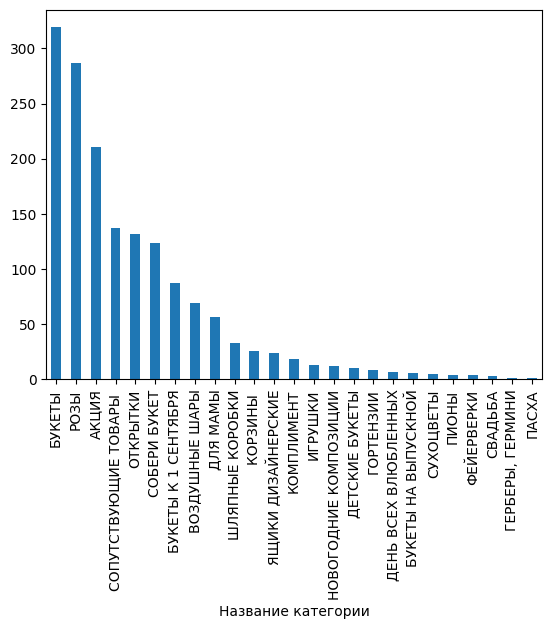

In [24]:
#Количество покупок в категории
category_purchases = bouquets['Название категории'].value_counts()
print(category_purchases)
category_purchases.plot(kind='bar')
plt.show()

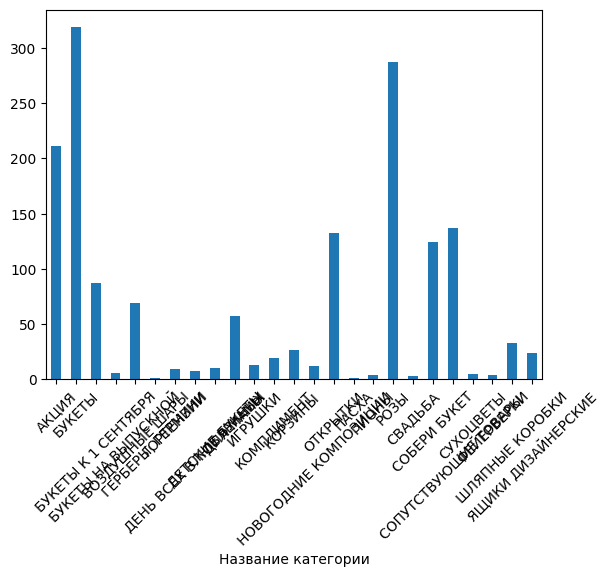

In [40]:

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файлов
bouquets = pd.read_csv(r'C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/bouquets_labels.csv')


bouquets['Время доставки'] = pd.to_datetime(bouquets['Время доставки'], format='%d.%m.%Y')

bouquets['Время доставки'].groupby(bouquets['Название категории']).count().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()


In [38]:
import os
from PIL import Image
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
# Путь к папке с изображениями
images_path = r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2'

# Создаем DataFrame для хранения результатов
df_bouquets = pd.DataFrame(columns=['file', 'dominant_colors_rgb', 'dominant_colors_name', 'color_intensity'])

# Функция для определения преобладающих цветов
def get_dominant_colors(image_path, num_colors=4):
    # Загружаем изображение
    image = Image.open(image_path)
    # Преобразуем в массив numpy
    np_image = np.array(image)
    # Изменяем форму массива в список пикселей
    pixels = np_image.reshape((-1, 3))
    
    # Используем KMeans для нахождения преобладающих цветов
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(pixels)
    
    # Центры кластеров являются преобладающими цветами
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return dominant_colors

# Функция для определения интенсивности цвета
def get_color_intensity(rgb_values):
    # Простая оценка интенсивности может быть основана на среднем значении каналов RGB
    return np.mean(rgb_values)

# Создаем пустой список для хранения данных о каждом изображении
bouquets_data = []

# Обходим все файлы в папке с изображениями
for file in os.listdir(images_path):
    if file.endswith(('.jpg', '.png')):
        file_path = os.path.join(images_path, file)
        try:
            # Получаем преобладающие цвета
            dominant_colors = get_dominant_colors(file_path)
            # Получаем интенсивности цветов
            color_intensities = [get_color_intensity(color) for color in dominant_colors]
            
            # Добавляем данные о букете в список
            bouquets_data.append({
                'file': file,
                'dominant_colors_rgb': dominant_colors.tolist(),
                'color_intensity': color_intensities
            })
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Преобразуем список словарей в DataFrame
df_bouquets = pd.DataFrame(bouquets_data)

# Сохраняем результаты в CSV
df_bouquets.to_csv('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_color.csv', index=False)


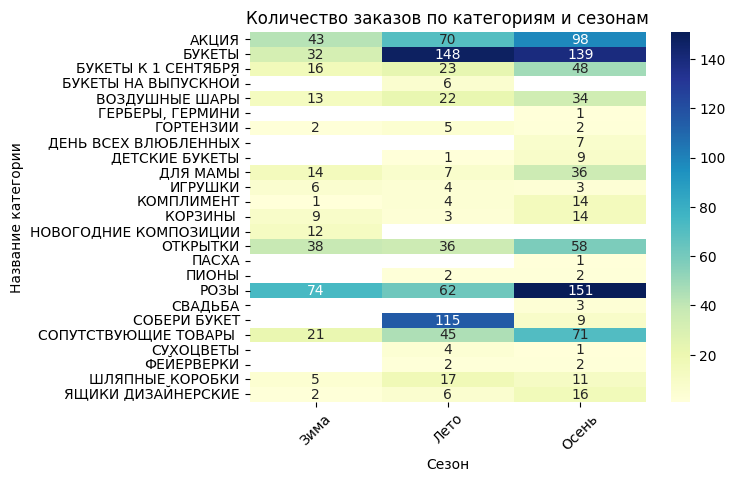

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загрузка данных
bouquets = pd.read_csv(r'C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/bouquets_labels.csv')
bouquets['Время доставки'] = pd.to_datetime(bouquets['Время доставки'], format='%d.%m.%Y')

# Определение функции для определения сезона по месяцу
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

# Применение функции к DataFrame для создания столбца 'Сезон'
bouquets['Сезон'] = bouquets['Время доставки'].apply(lambda x: get_season(x.month))

# Группировка данных по сезонам и категориям и подсчет количества заказов
seasonal_counts = bouquets.groupby(['Сезон', 'Название категории']).size().reset_index(name='Количество')

# Визуализация данных с помощью тепловой карты
pivot_table = seasonal_counts.pivot_table(index='Название категории', columns='Сезон', values='Количество')

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Количество заказов по категориям и сезонам')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Загрузка данных из CSV в DataFrame
df_bouquets = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\bouquets_color.csv')

# Проверка типа данных в колонке 'dominant_colors_rgb'
print(df_bouquets['dominant_colors_rgb'].dtype)


object


In [11]:

# Преобразование строки представляющей список в настоящий список Python
df_bouquets['dominant_colors_rgb'] = df_bouquets['dominant_colors_rgb'].apply(ast.literal_eval)

# Проверка первого элемента, чтобы убедиться, что преобразование прошло успешно
print(type(df_bouquets['dominant_colors_rgb'].iloc[0]))


<class 'list'>


In [13]:
import pandas as pd
import ast

# Загрузка данных из CSV в DataFrame
df_bouquets = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\bouquets_color.csv')


if 'dominant_colors_rgb' in df_bouquets.columns:
    # Преобразование строковых представлений списков в настоящие списки Python
    df_bouquets['dominant_colors_rgb'] = df_bouquets['dominant_colors_rgb'].apply(lambda x: ast.literal_eval(x))

    # Теперь 'dominant_colors_rgb' содержит списки, и вы можете работать с ними как со списками
    # Например, проверим тип первого элемента после преобразования
    print(type(df_bouquets['dominant_colors_rgb'].iloc[0]))
else:
    print("Колонка 'dominant_colors_rgb' не найдена в DataFrame.")


<class 'list'>


In [27]:
import pandas as pd
import ast  # Используется для преобразования строки в список

# Загружаем данные из CSV в DataFrame
df_bouquets = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\bouquets_color.csv')

# Определение функции для перевода RGB в название цвета

def rgb_to_color_name(rgb, colors_dict):
    colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
        (192, 192, 192): 'Серый'  # Добавлен серый для полноты картины
    }
    closest_colors = min(colors_dict.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors_dict.get(closest_colors, 'Неизвестный')


# Функция для преобразования строки с RGB значениями в список и применения функции к каждому цвету
def get_color_names(rgb_list_str):
    try:
        rgb_list = ast.literal_eval(rgb_list_str)  # Прямое преобразование строки в список
        color_names = [rgb_to_color_name(tuple(rgb)) for rgb in rgb_list]  # Применение функции
        return ', '.join(color_names)
    except Exception as e:
        return f'Error: {e}'  # Возвращаем ошибку для диагностики

# Применяем функцию get_color_names к DataFrame
df_bouquets['color_names'] = df_bouquets['dominant_colors_rgb'].apply(get_color_names)
# Сохраняем результаты в новый CSV-файл, чтобы не перезаписывать исходный
df_bouquets.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\bouquets_color_updated.csv', index=False)


In [ ]:
# преобразование RGB в признаки (простое усреднение значений RGB)
df_bouquets['avg_rgb'] = df_bouquets['dominant_colors_rgb'].apply(lambda x: np.mean(ast.literal_eval(x), axis=0))

# Разделение avg_rgb на отдельные колонки
df_bouquets[['avg_r', 'avg_g', 'avg_b']] = pd.DataFrame(df_bouquets['avg_rgb'].tolist(), index=df_bouquets.index)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#  колонка 'category' для обучения
X = df_bouquets[['avg_r', 'avg_g', 'avg_b']]  # Признаки
y = df_bouquets['category']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
predictions = model.predict(X_test)
print("Точность модели:", accuracy_score(y_test, predictions))


In [ ]:
# DataFrame new_bouquets с теми же признаками
new_predictions = model.predict(new_bouquets[['avg_r', 'avg_g', 'avg_b']])


In [20]:
# возьмем для анализа только 70% изображения от центра
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
def get_dominant_colors_pillow(image_path, roi_fraction=0.7, n_colors=3):
    # Открытие изображения
    image = Image.open(image_path)
    
    # Конвертация изображения в RGB
    image = image.convert('RGB')
    
    # Вычисление ROI
    w, h = image.size
    center_w, center_h = w // 2, h // 2
    roi_size_w, roi_size_h = int(center_w * roi_fraction), int(center_h * roi_fraction)
    roi = image.crop((center_w - roi_size_w, center_h - roi_size_h, center_w + roi_size_w, center_h + roi_size_h))
    
    # Преобразование изображения ROI в массив numpy для анализа
    roi_data = np.array(roi)
    roi_data = roi_data.reshape((-1, 3))
    
    # Кластеризация цветов в ROI
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(roi_data)
    
    # Получение доминирующих цветов
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return dominant_colors

# Пример использования
image_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\12861_548.jpg'  
dominant_colors = get_dominant_colors_pillow(image_path, roi_fraction=0.7, n_colors=3)
print("Доминирующие цвета:", dominant_colors)


C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Доминирующие цвета: [[180  81  50]
 [209 170 148]
 [ 75  58  44]]


In [29]:
    colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
         }

In [30]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

def get_dominant_colors_pillow(image_path, roi_fraction=0.7, n_colors=3, colors_dict=colors):
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    w, h = image.size
    center_w, center_h = w // 2, h // 2
    roi_size_w, roi_size_h = int(center_w * roi_fraction), int(center_h * roi_fraction)
    roi = image.crop((center_w - roi_size_w, center_h - roi_size_h, center_w + roi_size_w, center_h + roi_size_h))
    
    roi_data = np.array(roi)
    roi_data = roi_data.reshape((-1, 3))
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(roi_data)
    
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    # Перевод доминирующих цветов в названия
    dominant_color_names = [rgb_to_color_name(tuple(color), colors_dict) for color in dominant_colors]
    
    return dominant_color_names

image_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\12861_548.jpg'  
dominant_colors = get_dominant_colors_pillow(image_path, roi_fraction=0.7, n_colors=3)
print("Доминирующие цвета:", dominant_colors)


C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Доминирующие цвета: ['Оливковый', 'Чайный', 'Бордовый']


In [32]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import io

# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    # Преобразование изображения в массив numpy
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    
    # Использование KMeans для определения доминирующих цветов
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(pixels)
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return dominant_colors

# Функция для определения названий цветов на русском
def rgb_to_color_name(rgb):
    colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
         }

    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')

# Загрузка изображения
image_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\12861_548.jpg'  
image = Image.open(image_path)

# Обрезка центральной области изображения (70% от центра)
w, h = image.size
roi = image.crop((w*0.15, h*0.15, w*0.85, h*0.85))

# Получение доминирующих цветов
dominant_colors = get_dominant_colors(roi)

# Перевод цветов в названия
color_names = [rgb_to_color_name(tuple(color)) for color in dominant_colors]

color_names


C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['Чайный', 'Бордовый', 'Оливковый']

In [40]:
import os
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

# Определение функции для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    # Преобразование изображения в массив numpy
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    
    # Использование KMeans для определения доминирующих цветов
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(pixels)
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return dominant_colors

# Функция для обрезки и получения доминирующих цветов изображения
def process_image(image_path, roi_fraction=0.7, max_colors=5):
    # Открытие и обработка изображения
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # Определение размеров ROI
    w, h = image.size
    roi_w, roi_h = int(w * roi_fraction), int(h * roi_fraction)
    roi = image.crop(((w - roi_w) // 2, (h - roi_h) // 2, (w + roi_w) // 2, (h + roi_h) // 2))
    
    # Определение количества цветов для KMeans
    pixels = np.array(roi).reshape((-1, 3))
    inertia = []
    for i in range(1, max_colors + 1):
        kmeans = KMeans(n_clusters=i).fit(pixels)
        inertia.append(kmeans.inertia_)
    
    # Определение оптимального количества кластеров (цветов)
    diffs = np.diff(inertia)
    n_colors = np.argmin(diffs[diffs < 0]) + 1  # Определение количества цветов как первое значительное уменьшение инерции
    
    # Получение доминирующих цветов
    dominant_colors = get_dominant_colors(roi, n_colors=n_colors)
    return dominant_colors

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'  

# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]


# Создание DataFrame для результатов
df_results = pd.DataFrame(columns=['filename', 'color1', 'color2', 'color3', 'color4', 'color5'])

# Создание списка для хранения информации о цветах каждого изображения
color_info_list = []

# Обработка каждого изображения и добавление результатов в список словарей
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        dominant_colors = process_image(file_path)
        # Создание словаря для хранения информации о файлах и их доминирующих цветах
        color_info = {
            'filename': file,
            'color1': dominant_colors[0].tolist() if len(dominant_colors) > 0 else None,
            'color2': dominant_colors[1].tolist() if len(dominant_colors) > 1 else None,
            'color3': dominant_colors[2].tolist() if len(dominant_colors) > 2 else None,
            'color4': dominant_colors[3].tolist() if len(dominant_colors) > 3 else None,
            'color5': dominant_colors[4].tolist() if len(dominant_colors) > 4 else None,
        }
        color_info_list.append(color_info)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Создание DataFrame из списка словарей
df_results = pd.DataFrame(color_info_list)

# Сохранение результатов в CSV-файл
csv_output_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial.csv'
df_results.to_csv(csv_output_path, index=False)

df_results.head()  # Показать первые несколько результатов для проверки

C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\Desktop\myenv3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

filename           color1 color2 color3 color4 color5
0  100284_127723.jpg  [162, 101, 114]   None   None   None   None
1  100938_127807.jpg   [156, 150, 68]   None   None   None   None
2   100938_34617.jpg  [159, 130, 132]   None   None   None   None
3   100938_69925.jpg  [186, 144, 121]   None   None   None   None
4  101231_129804.jpg    [147, 28, 45]   None   None   None   None

In [42]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image
import os
import ast

colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
         }
# Функция для перевода RGB в название цвета использует глобальный словарь
def rgb_to_color_name(rgb):
    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')



# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, n_init=10)  # Явно задаем n_init
    kmeans.fit(pixels)
    return kmeans.cluster_centers_

# Функция для обработки изображения и определения доминирующих цветов
def process_image(file_path, n_colors=5):
    image = Image.open(file_path)
    image = image.convert('RGB')
    dominant_colors = get_dominant_colors(image, n_colors=n_colors)
    color_names = [rgb_to_color_name(tuple(map(int, color))) for color in dominant_colors]
    return color_names

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'  


# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# Список для результатов
results = []

# Обработка каждого файла
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        color_names = process_image(file_path, n_colors=3)
        result = {'filename': file}
        for i, color_name in enumerate(color_names):
            result[f'color{i+1}'] = color_name
        results.append(result)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Указываем правильный путь к файлу CSV с расширением .csv
csv_output_path = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial.csv'
df_results.to_csv(csv_output_path, index=False)

# Проверка наличия файла
if os.path.exists(csv_output_path):
    print(f"Файл {csv_output_path} успешно сохранен.")
else:
    print(f"Ошибка: файл {csv_output_path} не был создан.")

Файл C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial.csv успешно сохранен.


In [43]:
# Код для определения доминирующих цветов букета 70% от центра изображения и занесение в csv - автоматизация еженедельного апдейта
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import os
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore', category=FutureWarning)
import ast

colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
         }
# Функция для перевода RGB в название цвета использует глобальный словарь
def rgb_to_color_name(rgb):
    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')


# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, n_init=1, max_iter=100)
    kmeans.fit(pixels)
    return kmeans.cluster_centers_

# Функция для обработки изображения и определения доминирующих цветов
def process_image(file_path, n_colors=3):
    image = Image.open(file_path)
    image = image.convert('RGB')
    dominant_colors = get_dominant_colors(image, n_colors=n_colors)
    return dominant_colors

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'  

# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# Список для результатов
results = []

# Обработка каждого файла
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        dominant_colors = process_image(file_path, n_colors=5)
        color_names = [rgb_to_color_name(tuple(map(int, color))) for color in dominant_colors]
        result = {'filename': file}
        # Добавляем цвета и их названия в словарь
        for i, color in enumerate(dominant_colors):
            result[f'color{i+1}'] = color.tolist()  # Цвета в формате RGB
            result[f'color_name{i+1}'] = color_names[i]  # Названия цветов на русском
        results.append(result)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Создание DataFrame и сохранение в CSV
df_results = pd.DataFrame(results)
csv_output_path = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial.csv'
df_results.to_csv(csv_output_path, index=False)

df_results.head()  # Показать первые несколько строк DataFrame для проверки

filename                                             color1  \
0  100284_127723.jpg  [252.24610081282893, 201.24350698732917, 226.6...   
1  100938_127807.jpg  [35.48674129054747, 167.83727403327856, 119.23...   
2   100938_34617.jpg  [83.85475109589811, 80.90555809621071, 83.6847...   
3   100938_69925.jpg  [221.6674681200691, 176.5822098208283, 153.805...   
4  101231_129804.jpg  [192.14501710474482, 10.064990919695191, 39.64...   

  color_name1                                             color2  color_name2  \
0     Розовый  [24.615121882441514, 20.579474157105807, 26.77...  Темно-синий   
1   Бирюзовый  [213.13433772272543, 193.64223026483336, 56.94...    Оранжевый   
2   Пурпурный  [226.92542145642147, 201.4287558657, 201.62196...      Розовый   
3      Чайный  [34.00623972886984, 28.888711996726514, 17.199...     Бордовый   
4   Малиновый  [223.55289298848072, 206.77569502675, 209.3906...      Розовый   

                                              color3    color_name3  \
0  [192.40947859573558, 83.7990392213356, 111.303...      Малиновый   
1  [31.073916775014354, 36.396910325932495, 24.01...  Темно-зеленый   
2  [13.763072438454884, 13.494834642151517, 13.90...       Бордовый   
3  [176.30886213550065, 138.6192841807675, 116.90...         Чайный   
4  [54.63968167368742, 18.093767049821437, 22.330...       Бордовый   

                                              color4     color_name4  \
0  [231.94867999258116, 141.17777211366868, 163.7...  Бледно-розовый   
1  [126.93965203036369, 117.98537798551149, 92.17...       Оливковый   
2  [91.61985437524999, 106.67895592250703, 119.84...       Бирюзовый   
3  [229.43045319919625, 213.16734473733828, 200.2...         Розовый   
4  [180.68716281257286, 152.8902811667346, 158.93...  Бледно-розовый   

                                              color5 color_name5  
0  [99.70428276621044, 100.2864816434657, 105.561...   Бирюзовый  
1  [227.91796727082334, 217.9960137548905, 130.34...      Чайный  
2  [194.946999195842, 131.48610699622822, 131.576...      Чайный  
3  [119.41466533859682, 88.40437279422233, 60.201...   Оливковый  
4  [122.22440413466819, 19.79043181735696, 35.409...    Бордовый

In [57]:
# Код для определения доминирующих цветов букета 70% от центра изображения и занесение в csv - автоматизация еженедельного апдейта
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import os
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore', category=FutureWarning)
import ast

colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой2',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (239, 169, 74): 'Пастельно-желтый',
        (127, 181, 181): 'Пастельно-бирюзовый',
        (93, 155, 155): 'Пастельно-синий',
        (161, 133, 148): 'Пастельно-фиолетовый',
        (119, 221, 119): 'Пастельно-зеленый',
        (255, 117, 20): 'Пастельно-оранжевый',
        (255, 140, 105): 'Лососевый',
        (255, 155, 170): 'Лососевый Крайола',
        (255, 178, 139): 'Светлый желто-розовый',
        (252, 232, 131): 'Желтый Крайола',
        (190, 189, 127): 'Зелено-бежевый',
        (198, 223, 144): 'Очень светлый желто-зеленый',
        (153, 255, 153): 'Салатовый',
        (175, 218, 252): 'Синий-синий иней',
        (230, 230, 250): 'Лавандовый',
        (255,209,220): 'Пастельно-розовый',
        (255, 165, 0): 'Оранжевый',
        (202, 1, 71): 'Рубиновый',
        (155, 45, 48): 'Бордовый',
        (243, 71, 35): 'Гранатовый',
        (144, 0, 32): 'Бургундский',
        (72, 6, 7): 'Болгарская роза',
        (169, 32, 62): 'Глубокий карминный',
        (145, 30, 66): 'Вишневый',
        (150, 0, 24): 'Кармин',
        (179, 40, 33): 'Кораллово-красный',
        (213, 113, 63): 'Ванильный',
        (100, 19, 73): 'Глубокий красно-пурпурный',
        (123, 0, 28): 'Глубокий красный',
        (255, 255, 153): 'Канареечный',
        (228, 113, 122): 'Карамельно-розовый',
        (213, 48, 50): 'Клубнично-красный',
        (218, 112, 214): 'Орхидея',
        (204, 119, 34): 'Охра',
        (176, 224, 230): 'Пыльный голубой',
        (222, 49, 99): 'Светлая вишня',
        (204, 78, 92): 'Терракота',
        (138, 43, 226): 'Сине-лиловый',
        (102, 0, 102): 'Сливовый',
        (17, 96, 98): 'Темно-бирюзовый',
        (234, 141, 247): 'Фиалковый'
         }

# Функция для перевода RGB в название цвета использует глобальный словарь
def rgb_to_color_name(rgb):
    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')


# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, n_init=1, max_iter=100)
    kmeans.fit(pixels)
    return kmeans.cluster_centers_

# Функция для обработки изображения и определения доминирующих цветов
def process_image(file_path, n_colors=3):
    image = Image.open(file_path)
    image = image.convert('RGB')
    dominant_colors = get_dominant_colors(image, n_colors=n_colors)
    return dominant_colors

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'  

# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# Список для результатов
results = []

# Обработка каждого файла
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        dominant_colors = process_image(file_path, n_colors=5)
        color_names = [rgb_to_color_name(tuple(map(int, color))) for color in dominant_colors]
        result = {'filename': file}
        # Добавляем цвета и их названия в словарь
        for i, color in enumerate(dominant_colors):
            result[f'color{i+1}'] = color.tolist()  # Цвета в формате RGB
            result[f'color_name{i+1}'] = color_names[i]  # Названия цветов на русском
        results.append(result)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Создание DataFrame и сохранение в CSV
df_results = pd.DataFrame(results)
csv_output_path = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial2.csv'
df_results.to_csv(csv_output_path, index=False)

df_results.head()  # Показать первые несколько строк DataFrame для проверки


filename                                             color1  \
0  100284_127723.jpg  [249.74743227200668, 188.69599813925646, 213.8...   
1  100938_127807.jpg  [127.00632012308368, 118.04413901054912, 92.24...   
2   100938_34617.jpg  [183.16842772897843, 117.64172840505896, 119.3...   
3   100938_69925.jpg  [229.47415648239905, 212.47364411198976, 199.1...   
4  101231_129804.jpg  [122.97416399885964, 19.57786601493015, 35.411...   

            color_name1                                             color2  \
0               Розовый  [94.98168614800025, 84.24532356920287, 87.6411...   
1  Пастельно-фиолетовый  [227.82114111875268, 217.81849180530278, 129.7...   
2  Пастельно-фиолетовый  [14.979908156904216, 14.084554337469015, 14.35...   
3               Розовый  [118.22565326601784, 87.70513990076299, 59.488...   
4      Глубокий красный  [223.9055536297371, 207.18322857458645, 209.66...   

                 color_name2  \
0  Глубокий красно-пурпурный   
1                     Чайный   
2            Болгарская роза   
3                   Бордовый   
4          Пастельно-розовый   

                                              color3            color_name3  \
0  [22.209719602997822, 19.22073215218093, 25.784...        Болгарская роза   
1  [31.107570931588782, 36.43963835943194, 24.034...        Болгарская роза   
2  [86.71869531803603, 97.90946945190797, 107.799...        Темно-бирюзовый   
3  [220.5553367674387, 174.56139632329214, 151.83...  Светлый желто-розовый   
4  [180.9193493056044, 153.21284789463158, 159.33...   Пастельно-фиолетовый   

                                              color4         color_name4  \
0  [202.51326549816068, 97.72354016799513, 123.64...  Карамельно-розовый   
1  [212.9540458050913, 193.33714388834824, 55.979...    Пастельно-желтый   
2  [235.61357454499694, 217.4825480567971, 215.40...   Пастельно-розовый   
3  [33.692133523123175, 28.638504334338577, 17.03...     Болгарская роза   
4  [192.59645983634152, 10.080997462127883, 39.72...   Кораллово-красный   

                                              color5           color_name5  
0  [112.8750272402983, 122.18433940839847, 132.28...       Пастельно-синий  
1  [35.50889541151827, 167.90322870492105, 119.28...             Бирюзовый  
2  [214.79458603977093, 176.22021827297044, 177.6...        Бледно-розовый  
3  [174.7502910590047, 137.69142683591232, 115.94...  Пастельно-фиолетовый  
4  [55.181410363163664, 18.33766209739983, 22.568...       Болгарская роза

Мы получаем цвета букета автоматически, теперь выделим основные признаки:
монохром-полихром
контрастный-однотонный
роскошный (красный)-бюджетный (ораннжевый).0

In [63]:
# один из вариантов визуального сходства букетов это сходство по цвету

def classify_color_features(color_names):
    features = {
        'monochrome': False,
        'polychrome': False,
        'bright': False,
        'light': False,
        'contrast': False,
        'luxury': False,  # Для дорогих букетов
        'budget': False,  # Для бюджетных букетов
    }

    unique_colors = set(color_names)
    features['monochrome'] = len(unique_colors) == 1
    features['polychrome'] = len(unique_colors) > 2
    
    # Определение яркости и контрастности
    bright_colors = {
        (255, 0, 0): 'Красный', 
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (255, 0, 255): 'Фуксия',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
        (202, 1, 71): 'Рубиновый',
        (155, 45, 48): 'Бордовый',
        (243, 71, 35): 'Гранатовый',
        (144, 0, 32): 'Бургундский',
        (72, 6, 7): 'Болгарская роза',
        (169, 32, 62): 'Глубокий карминный',
        (145, 30, 66): 'Вишневый',
        (150, 0, 24): 'Кармин',
        (179, 40, 33): 'Кораллово-красный',
        (213, 113, 63): 'Ванильный',
        (100, 19, 73): 'Глубокий красно-пурпурный',
        (123, 0, 28): 'Глубокий красный',
        (255, 255, 153): 'Канареечный',
        (213, 48, 50): 'Клубнично-красный',
        (218, 112, 214): 'Орхидея',
        (204, 119, 34): 'Охра',
        (176, 224, 230): 'Пыльный голубой',
        (222, 49, 99): 'Светлая вишня',
        (204, 78, 92): 'Терракота',
        (138, 43, 226): 'Сине-лиловый',
        (102, 0, 102): 'Сливовый',
        (17, 96, 98): 'Темно-бирюзовый',
        (234, 141, 247): 'Фиалковый'}
    light_colors = {
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (173, 216, 230): 'Голубой',
        (0, 255, 255): 'Голубой2',
        (239, 169, 74): 'Пастельно-желтый',
        (127, 181, 181): 'Пастельно-бирюзовый',
        (93, 155, 155): 'Пастельно-синий',
        (161, 133, 148): 'Пастельно-фиолетовый',
        (119, 221, 119): 'Пастельно-зеленый',
        (255, 117, 20): 'Пастельно-оранжевый',
        (255, 140, 105): 'Лососевый',
        (255, 155, 170): 'Лососевый Крайола',
        (255, 178, 139): 'Светлый желто-розовый',
        (252, 232, 131): 'Желтый Крайола',
        (190, 189, 127): 'Зелено-бежевый',
        (198, 223, 144): 'Очень светлый желто-зеленый',
        (153, 255, 153): 'Салатовый',
        (175, 218, 252): 'Синий-синий иней',
        (230, 230, 250): 'Лавандовый',
        (255,209,220): 'Пастельно-розовый',
        (213, 113, 63): 'Ванильный',
        (228, 113, 122): 'Карамельно-розовый',
        (176, 224, 230): 'Пыльный голубой'
    }

      # Определение ярких и светлых цветов
    bright_count = sum(color in bright_colors for color in color_names)
    light_count = sum(color in light_colors for color in color_names)

    features['bright'] = bright_count > 2
    features['light'] = light_count > 2

    # Контрастность определяется наличием как минимум одного яркого и одного светлого цвета
    features['contrast'] = bright_count > 0 and light_count > 0

    # Дорогие и бюджетные букеты
    if 'Красный' in color_names:
        features['luxury'] = True

    if 'Оранжевый' in color_names:
        features['budget'] = True

    return features

# Загрузка данных из исходного файла
df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_results.csv')

# Применение функции classify_color_features к каждой строке DataFrame
df_styles = df.apply(lambda row: classify_color_features([row[f'color_name{i}'] for i in range(1, 6) if row[f'color_name{i}'] is not np.nan]), axis=1, result_type='expand')

# Добавление результатов анализа к исходному DataFrame
df_combined = pd.concat([df, df_styles], axis=1)

# Сохранение в новый CSV-файл
output_file_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv'
df_combined.to_csv(output_file_path, index=False)

print("Файл успешно сохранен:", output_file_path)

df_combined = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv')

# Вывод первых нескольких строк для проверки
print(df_combined.head())


Файл успешно сохранен: C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv
            filename                                             color1  \
0  100284_127723.jpg  [249.74743227200668, 188.69599813925646, 213.8...   
1  100938_127807.jpg  [127.00632012308368, 118.04413901054912, 92.24...   
2   100938_34617.jpg  [183.16842772897843, 117.64172840505896, 119.3...   
3   100938_69925.jpg  [229.47415648239905, 212.47364411198976, 199.1...   
4  101231_129804.jpg  [122.97416399885964, 19.57786601493015, 35.411...   

            color_name1                                             color2  \
0               Розовый  [94.98168614800025, 84.24532356920287, 87.6411...   
1  Пастельно-фиолетовый  [227.82114111875268, 217.81849180530278, 129.7...   
2  Пастельно-фиолетовый  [14.979908156904216, 14.084554337469015, 14.35...   
3               Розовый  [118.22565326601784, 87.70513990076299, 59.488...   
4      Глубокий красный  [223.90555362973

## Реализация автоматизированного отнесения к стилю пошла не очень хорошо, так как, несмотря на ограничение 70%, захватываются края фотографий, обертка. Тем не менее, мы можем попробовать установить сходство прямо по доминирующим  цветам букетов. в перспективе можно уточнить фотографии или сделать семантическую разметку, и тогда этот подход будет работать. Пробуем сейчас сходство по цветам.

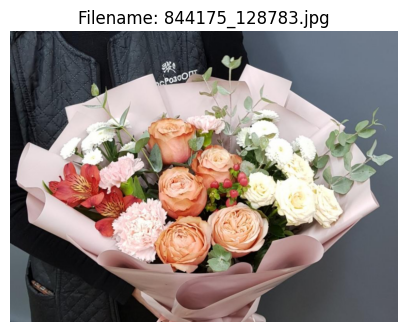

In [67]:
# Вывод букетов по ИД Заказчика import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

# Путь к папке с изображениями
images_path = r"C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2"

# Функция для отображения изображений товаров по client_id
def display_customer_purchases(client_id, images_path):
    # Преобразование client_id в строку, если это необходимо
    client_id_str = str(client_id)
    
    # Перебор всех файлов в директории
    for file in os.listdir(images_path):
        # Проверка, начинается ли имя файла с client_id
        if file.startswith(f"{client_id_str}_"):
            # Путь к изображению
            img_path = os.path.join(images_path, file)
            # Загрузка и отображение изображения
            img = Image.open(img_path)
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.title(f"Filename: {file}")
            plt.axis('off')
            plt.show()

# Пример использования для клиента с ID = 844175
display_customer_purchases(844175, images_path)



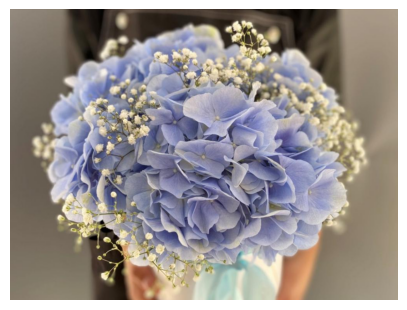

In [65]:
from PIL import Image
import matplotlib.pyplot as plt

# Пример отображения одного изображения
img_path = r"C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\980103_6336.jpg"
img = Image.open(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:


# Загрузка данных о заказах
orders_df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders7.csv', index=False)

# Подсчёт количества заказов для каждого покупателя
customer_order_counts = orders_df['заказчик'].value_counts()

# Определение повторных покупателей (тех, кто совершил более одной покупки)
regular_customers = customer_order_counts[customer_order_counts > 1].index

# Сохранение списка повторных покупателей в CSV
regular_customers_df = pd.DataFrame(regular_customers, columns=['заказчик'])
regular_customers_df.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\regular_customers.csv', index=False)


In [82]:
# повторные покупатели
import pandas as pd

# Загрузка данных о заказах
orders_df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders7.csv')

# Преобразование столбца с датами в формат datetime, указывая, что день идет первым
orders_df['Оформлен'] = pd.to_datetime(orders_df['Оформлен'], format='%d.%m.%Y', dayfirst=True)

# Группировка данных по 'Заказчик', 'Товар', и 'Дата покупки' и подсчёт количества покупок
customer_purchase_counts = orders_df.groupby(['Заказчик', 'Товар', 'Оформлен']).size().groupby('Заказчик').size()

# Определение повторных покупателей (тех, кто совершил более одной покупки)
regular_customers = customer_purchase_counts[customer_purchase_counts > 1]
# Преобразование столбца с датами в формат datetime
orders_df['Оформлен'] = pd.to_datetime(orders_df['Оформлен'])

# Создание DataFrame с данными о повторных покупателях и количестве их покупок
regular_customers_df = regular_customers.reset_index(name='Количество покупок')

# Сортировка по количеству покупок
regular_customers_df = regular_customers_df.sort_values('Количество покупок', ascending=False)

# Сохранение списка повторных покупателей и количества их уникальных товаров в CSV
unique_product_counts_df.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\regular_customers.csv')

# Вывод первых строк для проверки
print(regular_customers_df.head())



     Заказчик  Количество покупок
106  539563.0                  14
36   139870.0                  14
123  617466.0                  12
103  529928.0                  11
4      4843.0                  11


In [71]:
# Показать первые строки DataFrame
print(regular_customers_df.head())


   Заказчик
0  781882.0
1  781212.0
2  539563.0
3  529928.0
4  513597.0


In [85]:
# Создадим файл только по повторным заказчикам

orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/orders7.csv")

# Загрузка данных о повторных заказчиках
regular_customers_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers.csv")

# Преобразование 'Заказчик' в строковый тип, если он числовой
orders_df['Заказчик'] = orders_df['Заказчик'].astype(str)
regular_customers_df['Заказчик'] = regular_customers_df['Заказчик'].astype(str)

# Фильтрация orders_df, чтобы оставить только те строки, где 'Заказчик' присутствует в regular_customers_df
filtered_orders_df = orders_df[orders_df['Заказчик'].isin(regular_customers_df['Заказчик'])]

# Сохранение отфильтрованных данных в новый CSV-файл
filtered_orders_df.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/filtered_orders_for_regular_customers.csv", index=False)


In [87]:
# добавим в файл также стоимость общего чека повторного заказчика.
# Загрузка отфильтрованных данных о заказах
filtered_orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/filtered_orders_for_regular_customers.csv")

# Загрузка данных о повторных заказчиках
regular_customers_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers.csv")

# Объединение данных о повторных заказчиках с отфильтрованными заказами
merged_df = pd.merge(filtered_orders_df, regular_customers_df, on='Заказчик', how='left')

# Предположим, что у нас есть колонка 'Сумма' в filtered_orders_df, содержащая стоимость каждого заказа
# Расчет общего чека для каждого заказчика
total_spent = merged_df.groupby('Заказчик')['Стоимость'].sum().reset_index(name='Общий чек')

# Объединение данных о общем чеке с основным DataFrame
merged_df = pd.merge(merged_df, total_spent, on='Заказчик', how='left')

# Сохранение итогового DataFrame в новый CSV-файл
merged_df.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed.csv", index=False)


In [88]:
# Сортировка DataFrame по 'Общий чек' в порядке убывания
merged_df_sorted = merged_df.sort_values('Общий чек', ascending=False)

# Сохранение отсортированного DataFrame в новый CSV-файл
merged_df_sorted.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed_sorted.csv", index=False)
merged_df_sorted.head()

№    Оформлен  Заказчик      Пол Тип заказа Время доставки  \
272  64230.0  14.06.2023    3246.0  Мужской   Доставка     15.06.2023   
294  67582.0  20.01.2024    3246.0  Мужской   Доставка     20.01.2024   
202  64809.0  16.07.2023    3246.0  Мужской   Доставка     17.07.2023   
201  64809.0  16.07.2023    3246.0  Мужской   Доставка     17.07.2023   
363  66804.0  26.11.2023    3246.0  Мужской   Доставка     26.11.2023   

     Стоимость Статус заказа     Товар        Название товара  \
272    11360.0      В работе  129321.0       Роза Candlelight   
294     5124.0      В работе  128807.0        Пудровые облака   
202     3895.0      В работе   18775.0  Шар С рождением! 30см   
201     3895.0      В работе  127807.0         Свежесть полей   
363     3005.0      В работе  128794.0               Лепесток   

    Название категории                              Ссылка на изображение  \
272               РОЗЫ  http://admin2.onedelivery.su/slim/tmp2/62938c0...   
294             БУКЕТЫ  http://admin2.onedelivery.su/slim/tmp2/623d6eb...   
202     ВОЗДУШНЫЕ ШАРЫ  http://admin2.onedelivery.su/slim/tmp2/61fd25f...   
201              АКЦИЯ  http://admin2.onedelivery.su/slim/tmp2/6281f71...   
363         КОМПЛИМЕНТ  http://admin2.onedelivery.su/slim/tmp2/623d65c...   

     Стоимость товара  Количество  Unnamed: 0  Количество уникальных товаров  \
272            3375.0         1.0           1                             10   
294            5124.0         1.0           1                             10   
202             130.0        10.0           1                             10   
201            2245.0         1.0           1                             10   
363            2605.0         1.0           1                             10   

     Общий чек  
272    79302.0  
294    79302.0  
202    79302.0  
201    79302.0  
363    79302.0

## Отметим важное! Без изображений сходство покупателей и товаров а данном случае искать нецелесообразно. Так как атрибуты для сравнения остаются только числовые идентификаторы и название категорий. Возьмем несколько категорий для логики сравнения по категории, но как общую логику ее применять не будем. Не все категории позволяют сравнивать.


In [91]:
# Какие же категории нам позволяют сравнивать?
df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed.csv")

# Вывод уникальных категорий товаров
unique_categories = df['Название категории'].unique()
print("Уникальные категории товаров:", unique_categories)


Уникальные категории товаров: ['БУКЕТЫ' 'СУХОЦВЕТЫ' 'БУКЕТЫ К 1 СЕНТЯБРЯ' 'РОЗЫ' 'СОПУТСТВУЮЩИЕ ТОВАРЫ '
 'АКЦИЯ' 'ОТКРЫТКИ' 'ВОЗДУШНЫЕ ШАРЫ' 'ДЛЯ МАМЫ' 'КОРЗИНЫ ' 'ПАСХА'
 'СОБЕРИ БУКЕТ' 'ИГРУШКИ' 'СВАДЬБА' 'ШЛЯПНЫЕ КОРОБКИ' 'ЯЩИКИ ДИЗАЙНЕРСКИЕ'
 'БУКЕТЫ НА ВЫПУСКНОЙ' 'ГОРТЕНЗИИ' 'КОМПЛИМЕНТ' 'НОВОГОДНИЕ КОМПОЗИЦИИ'
 'ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ' 'ДЕТСКИЕ БУКЕТЫ']


## предложение. Исключить:
Пасха, Гортензии, Комплимент, Собери букет, Свадьба, Букеты на выпускной: Эти категории могут быть неактуальны для повторных рекомендаций из-за их уникальности или сезонности (кроме "Собери букет", который исключен магазином)
## Постоянные повторы
Для мамы, 1 сентября, Сухоцветы, Розы, Акция, Шляпные коробки, Ящики дизайнерские, Воздушные шары, Открытки, Сопутствующие товары: Эти категории представляют собой широкий спектр товаров, которые могут интересовать покупателей круглый год. Включение их в список для повторных рекомендаций поддерживает разнообразие предложений и может способствовать увеличению продаж.Комментарии. Для мамы, 1 сентября: Эти категории популярны независимо от сезона, представляя собой бюджетные и популярные варианты для подарков.
Сухоцветы могут служить длительное время, что делает их актуальным подарком.
Розы: Классический выбор, всегда популярен среди покупателей.
.

In [ ]:
def generate_recommendations(customer_id, n_recommendations=10):
    # Загрузка данных о последней покупке клиента
    last_purchase_info = get_last_purchase(customer_id)
    last_purchase_category = last_purchase_info['Категория']
    last_purchase_image = last_purchase_info['Изображение']

    recommendations = []

    # Если категория последней покупки входит в постоянные, добавляем рекомендации из категорий
    if last_purchase_category in CONSTANT_CATEGORIES:
        category_recommendations = recommendations_from_categories([last_purchase_category], n_recommendations // 2)
        recommendations.extend(category_recommendations)

    # Добавляем рекомендации по цвету
    color_recommendations = find_similar_by_color(last_purchase_image, n_recommendations - len(recommendations))
    recommendations.extend(color_recommendations)

    return recommendations

# Предполагаем, что функции get_last_purchase, find_similar_by_color, и recommendations_from_categories уже реализованы


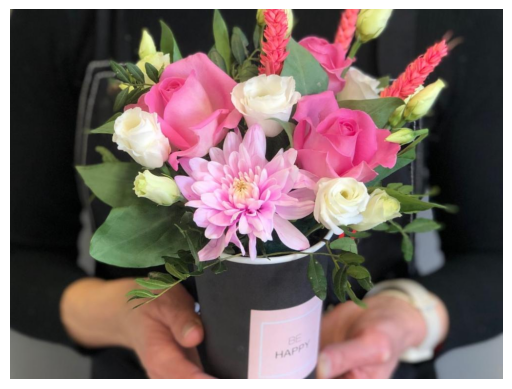

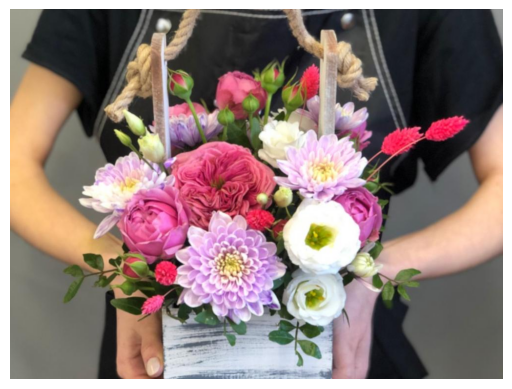

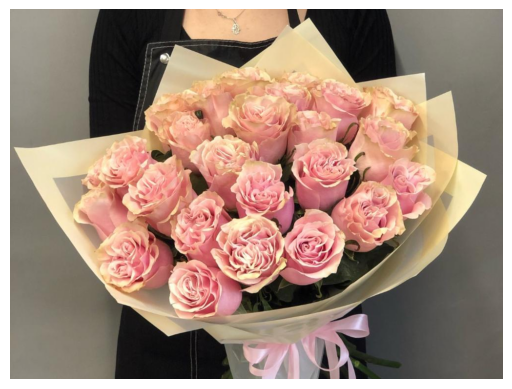

In [102]:
# Ищем цветовое сходство между товарами
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка DataFrame с цветами и результатами
df_colors = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/colors_trial_with_results.csv")

# Объединение всех названий цветов в одну строку для каждого товара
df_colors['all_colors'] = df_colors[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Векторизация названий цветов
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors['all_colors'])

# Расчет косинусного сходства между товарами
cosine_sim = cosine_similarity(X, X)

def recommend_products(product_id, df_colors, cosine_sim, num_recommendations=3):
    # Находим индекс товара в DataFrame
    idx = df_colors.index[df_colors['filename'] == product_id].tolist()[0]

    # Список сходства для данного товара
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка товаров на основе сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получение индексов самых похожих товаров
    product_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Вывод изображений
    for i in product_indices:
        img_path = df_colors.iloc[i]['filename']
        img = Image.open(f"C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/{img_path}")
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Тестовый запуск для товара
test_product_id = '100284_127723.jpg'
recommend_products(test_product_id, df_colors, cosine_sim, num_recommendations=3)



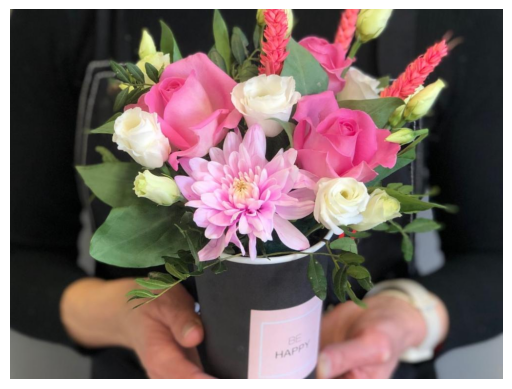

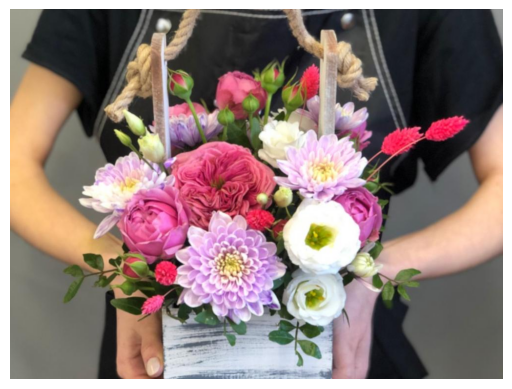

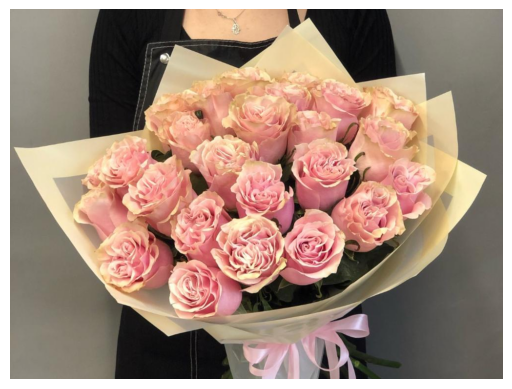

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import os
# Загрузка DataFrame с цветами и результатами
df_colors = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/colors_trial_with_results.csv")

# Объединение всех названий цветов в одну строку для каждого товара
df_colors['all_colors'] = df_colors[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Векторизация названий цветов
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors['all_colors'])

# Расчет косинусного сходства между товарами
cosine_sim = cosine_similarity(X, X)

def recommend_products(product_id, df_colors, cosine_sim, num_recommendations=3):
    # Находим индекс товара в DataFrame
    idx = df_colors.index[df_colors['filename'] == product_id].tolist()[0]

    # Список сходства для данного товара
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка товаров на основе сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получение индексов самых похожих товаров
    product_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Вывод изображений
    for i in product_indices:
        img_path = df_colors.iloc[i]['filename']
        img = Image.open(f"C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/{img_path}")
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()


def display_purchased_products(client_id, orders_df, images_path):
    # Находим купленные товары клиентом
    purchased_product_ids = orders_df[orders_df['Заказчик'] == client_id]['Товар'].unique()

    # Перебор всех товаров, купленных клиентом
    for product_id in purchased_product_ids:
        # Перебор всех файлов в указанной директории
        for file in os.listdir(images_path):
            # Проверка, содержит ли имя файла идентификатор товара
            if f"_{product_id}_" in file or file.endswith(f"_{product_id}.jpg"):
                # Путь к изображению
                img_path = os.path.join(images_path, file)
                # Загрузка и отображение изображения
                img = Image.open(img_path)
                plt.figure(figsize=(5, 5))
                plt.imshow(img)
                plt.title(f"Купленный товар: {product_id}")
                plt.axis('off')
                plt.show()

# Пример использования
client_id = 109246  # Примерный ID клиента
orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/orders7.csv")
images_path = "C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2"
display_purchased_products(client_id, orders_df, images_path)


# Функция для рекомендации продуктов на основе одного из купленных товаров
def recommend_products_based_on_one_purchased(purchased_product_id, df_colors, cosine_sim, num_recommendations=3):
    recommend_products(purchased_product_id, df_colors, cosine_sim, num_recommendations)

# Загрузка DataFrame с цветами и результатами
df_colors = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/colors_trial_with_results.csv")
# Векторизация и косинусное сходство как в вашем примере...

# Отображение купленных товаров
display_purchased_products(client_id, orders_df, images_path)

#ТЕСТ что client_id купил товар с product_id равным одному из тестовых
purchased_product_id = '100284_127723.jpg'  # Примерный ID купленного товара
recommend_products_based_on_one_purchased(purchased_product_id, df_colors, cosine_sim, num_recommendations=3)


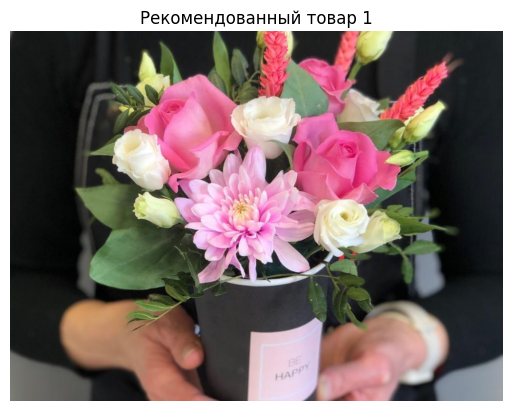

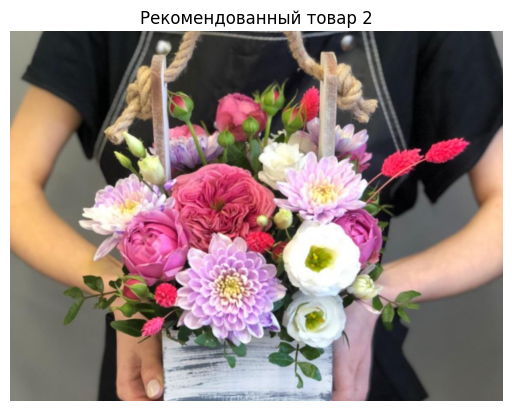

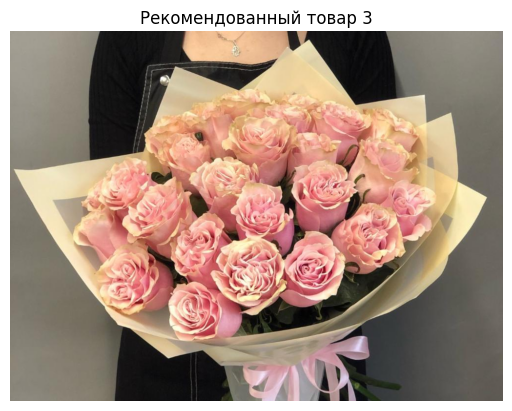

In [104]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Функция для отображения купленных товаров клиентом
def display_purchased_products(client_id, orders_df, images_path):
    purchased_product_ids = orders_df[orders_df['Заказчик'] == client_id]['Товар'].unique()
    for product_id in purchased_product_ids:
        for file in os.listdir(images_path):
            if f"_{product_id}_" in file or file.endswith(f"_{product_id}.jpg"):
                img_path = os.path.join(images_path, file)
                img = Image.open(img_path)
                plt.figure(figsize=(5, 5))
                plt.imshow(img)
                plt.title(f"Купленный товар: {product_id}")
                plt.axis('off')
                plt.show()

# Функция для рекомендации продуктов на основе одного из купленных товаров
def recommend_products_based_on_one_purchased(purchased_product_id, df_colors, cosine_sim, num_recommendations=3):
    # Находим индекс товара в DataFrame
    idx = df_colors.index[df_colors['filename'].str.contains(f"_{purchased_product_id.split('_')[1]}")].tolist()
    if not idx:
        print("Товар не найден.")
        return
    
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    product_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    for i, product_idx in enumerate(product_indices):
        img_path = df_colors.iloc[product_idx]['filename']
        img = Image.open(f"{images_path}/{img_path}")
        plt.figure()
        plt.imshow(img)
        plt.title(f"Рекомендованный товар {i+1}")
        plt.axis('off')
        plt.show()

# Загрузка данных
client_id = 109246
orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/orders7.csv")
images_path = "C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2"
df_colors = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/colors_trial_with_results.csv")
vectorizer = CountVectorizer()

cosine_sim = cosine_similarity(X, X)

# Отображение купленных товаров
display_purchased_products(client_id, orders_df, images_path)

# Рекомендация на основе одного из купленных товаров
purchased_product_id = '100284_127723.jpg'
recommend_products_based_on_one_purchased(purchased_product_id, df_colors, cosine_sim, num_recommendations=3)


In [109]:
# Вывод покупок и рекомендаций в двух колонках.
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import numpy as np


def display_purchases_and_recommendations(client_id, orders_df, df_colors, images_path, vectorizer, cosine_sim, max_recommendations=8):
    purchased_product_ids = orders_df[orders_df['Заказчик'] == client_id]['Товар'].unique()
    num_purchased = len(purchased_product_ids)

    # Ограничение количества рекомендаций
    num_recommendations = max_recommendations - num_purchased
    
    fig = plt.figure(constrained_layout=True, figsize=(20, 10))
    gs = GridSpec(2, max_recommendations, figure=fig)

    # Отображение купленных товаров
    for idx, product_id in enumerate(purchased_product_ids):
        for file in os.listdir(images_path):
            if f"_{product_id}_" in file or file.endswith(f"_{product_id}.jpg"):
                img_path = os.path.join(images_path, file)
                img = Image.open(img_path)
                ax = fig.add_subplot(gs[0, idx])
                ax.imshow(img)
                ax.set_title(f"Купленный товар: {product_id}")
                ax.axis('off')
    
    # Генерация рекомендаций на основе первого купленного товара
    first_purchased_product_id = f"{client_id}_{purchased_product_ids[0]}"
    recommend_products_based_on_one_purchased(first_purchased_product_id, df_colors, cosine_sim, vectorizer, num_recommendations, gs, fig, 1)


def recommend_products_based_on_one_purchased(purchased_product_id, df_colors, cosine_sim, num_recommendations=3):
    # Извлекаем идентификатор товара из полного имени файла
    product_id = purchased_product_id.split('_')[1]
    
    # Поиск соответствия идентификатора товара в df_colors
    idx = df_colors[df_colors['filename'].str.contains(f"_{product_id}")].index.tolist()
    if not idx:  # Если список пуст, значит совпадений нет
        print("Нет совпадений для данного товара.")
        return

    idx = idx[0]  # Берем первый индекс из списка
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    product_indices = [i[0] for i in sim_scores[1: num_recommendations + 1]]

    # Вывод рекомендованных товаров
    for i, product_idx in enumerate(product_indices):
        img_path = df_colors.iloc[product_idx]['filename']
        img = Image.open(f"{images_path}/{img_path}")
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Рекомендованный товар {i+1}")
        plt.axis('off')
        plt.show()


In [158]:
#! Объеддинение датасетов, чтобы каждому КУПЛЕННОМУ товару соответствовала цветовая гамма, а не каждому уникальному товару. 
# Загрузка данных
df_colors = pd.read_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_with_product_id.csv')
df_orders_7 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders7.csv')  

# Создаем новую колонку `Товар1`, извлекая идентификатор товара из имени файла
df_colors['Товар1'] = df_colors['filename'].apply(lambda x: x.split('_')[1].split('.')[0])

df_colors.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors1.csv', index=False)

In [166]:
# Загрузка данных
df_colors = pd.read_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors1.csv')
df_orders_7 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders7.csv')  

# Убедимся, что обе колонки имеют строковый тип данных
df_orders_7['Товар'] = df_orders_7['Товар'].astype(str)
df_colors['Товар1'] = df_colors['Товар1'].astype(str)

df_orders_7.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders8.csv', index=False)

In [167]:

# Загрузка данных
df_colors = pd.read_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors1.csv')
df_orders_7 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders8.csv')  

# Слияние датафреймов
df_merged = pd.merge(df_orders_7, df_colors, left_on='Товар', right_on='Товар1', how='left')

# Удаляем лишнюю колонку 'Товар1', если она больше не нужна
df_merged.drop('Товар1', axis=1, inplace=True)

# Проверяем результат слияния
print(df_merged.head())

df_merged.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders9.csv', index=False)

         №    Оформлен  Заказчик      Пол Тип заказа Время доставки  \
0  65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
1  65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
2  65969.0  30.09.2023  179598.0  Мужской   Доставка     30.09.2023   
3  65962.0  29.09.2023  810193.0  Мужской   Доставка     29.09.2023   
4  65954.0  29.09.2023  802444.0  Мужской   Доставка     29.09.2023   

   Стоимость Статус заказа   Товар_x    Название товара  ...  \
0     3509.0      В работе    6899.0  Красивое цветение  ...   
1     3509.0      В работе  128833.0             Топпер  ...   
2     2200.0      В работе     586.0     Краски природы  ...   
3     1165.0      В работе  128771.0             Персик  ...   
4     2225.0      В работе     607.0        Самой милой  ...   

                                              color2      color_name2  \
0  [16.191488958317365, 16.53495470980927, 18.519...  Болгарская роза   
1                                         

In [168]:
# Загрузка данных
df_colors = pd.read_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors1.csv')
df_orders_7 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders9.csv')  
# Заполнение отсутствующих значений цветов
df_merged[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']] = df_merged[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].fillna('Нет цвета')

# Сохранение в CSV
df_merged.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders10.csv', index=False)

#Мы объединили все данные по цветовой гамме в одну таблицу. 

In [175]:
# Версия от З.
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders10.csv')

# Объединение всех названий цветов в одну строку для каждого товара
df_colors1['all_colors'] = df_colors1[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Векторизация названий цветов
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])

# Расчет косинусного сходства между товарами
cosine_sim = cosine_similarity(X, X)

def recommend_products(product_id, df_colors1, cosine_sim, num_recommendations=3):
    # Находим индекс товара в DataFrame
    idx = df_colors1.index[df_colors['filename'] == product_id].tolist()[0]

    # Список сходства для данного товара
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка товаров на основе сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получение индексов самых похожих товаров
    product_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Вывод изображений
    for i in product_indices:
        img_path = df_colors.iloc[i]['filename']
        img = Image.open(f"C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/{img_path}")
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [210]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders10.csv')
# Объединение всех названий цветов в одну строку для каждого товара
df_colors1['all_colors'] = df_colors1[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].apply(lambda x: ' '.join(x.dropna()), axis=1)
df_colors1.head



<bound method NDFrame.head of             №    Оформлен  Заказчик      Пол Тип заказа Время доставки  \
0     65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
1     65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
2     65969.0  30.09.2023  179598.0  Мужской   Доставка     30.09.2023   
3     65962.0  29.09.2023  810193.0  Мужской   Доставка     29.09.2023   
4     65954.0  29.09.2023  802444.0  Мужской   Доставка     29.09.2023   
...       ...         ...       ...      ...        ...            ...   
1597      NaN  01.10.2023  457724.0  Мужской   Доставка     01.10.2023   
1598  65989.0  01.10.2023  701790.0  Мужской   Доставка     01.10.2023   
1599      NaN  01.10.2023  701790.0  Мужской   Доставка     01.10.2023   
1600      NaN         NaN       NaN      NaN        NaN            NaN   
1601      NaN         NaN       NaN      NaN        NaN            NaN   

      Стоимость Статус заказа   Товар_x    Название товара  ...  \
0        3509.

In [215]:
# Сохранение в CSV
df_colors1.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders11.csv', encoding='utf-8-sig', index=False)

In [214]:
import gc
gc.collect()

10422

DataFrame загружен.
Все необходимые колонки присутствуют.
Колонка 'Товар' преобразована в строковый тип.
Матрица сходства создана.
Поиск рекомендаций для товара с ID: 130099
Индекс найденного товара: 767
Список сходства получен.
Индексы рекомендованных товаров: [91, 30, 101]


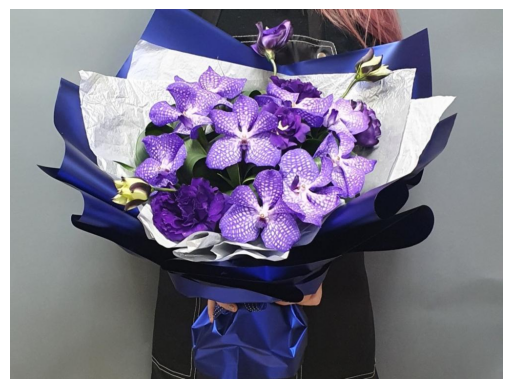

Изображение 818632_16634.jpg отображено.


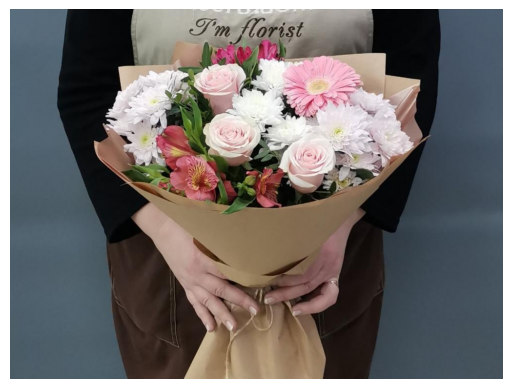

Изображение 165980_128799.jpg отображено.


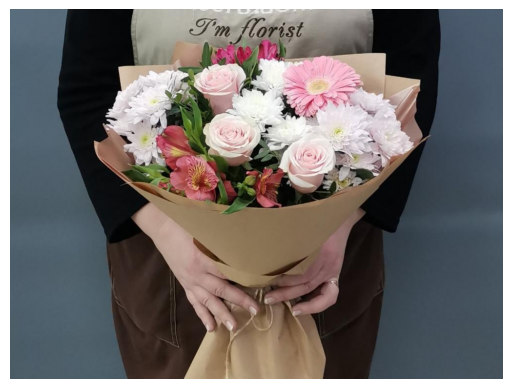

Изображение 165980_128799.jpg отображено.


In [226]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import os

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')
print("DataFrame загружен.")

# Проверяем, есть ли необходимые колонки в DataFrame
expected_columns = ['all_colors', 'Товар', 'filename']
missing_columns = [col for col in expected_columns if col not in df_colors1.columns]
if missing_columns:
    print(f"Отсутствуют следующие колонки: {missing_columns}")
else:
    print("Все необходимые колонки присутствуют.")
# Замена NaN в колонке 'Товар' на уникальное значение
df_colors1['Товар'] = df_colors1['Товар'].fillna(-1)

# Преобразование ID товаров в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(int).astype(str)
print("Колонка 'Товар' преобразована в строковый тип.")

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)
print("Матрица сходства создана.")

def recommend_products(product_id, df, cosine_sim, num_recommendations=3):
    print(f"Поиск рекомендаций для товара с ID: {product_id}")
    # Находим индексы товаров в DataFrame по ID товара
    product_indices = df.index[df['Товар'] == product_id].tolist()
    
    if not product_indices:
        print(f"Товар с ID {product_id} не найден.")
        return
    
    idx = product_indices[0]
    print(f"Индекс найденного товара: {idx}")
    
    # Список сходства для данного товара
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    print("Список сходства получен.")
    
    # Получаем индексы самых похожих товаров
    product_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
    print(f"Индексы рекомендованных товаров: {product_indices}")
    
    # Вывод изображений похожих товаров
    for i in product_indices:
        img_filename = df.iloc[i]['filename']
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            print(f"Изображение {img_filename} отображено.")
        else:
            print(f"Файл {img_path} не найден.")

# Пример использования
product_id_example = '130099'  # Пример ID тестового заказчика
recommend_products(product_id_example, df_colors1, cosine_sim, num_recommendations=3)


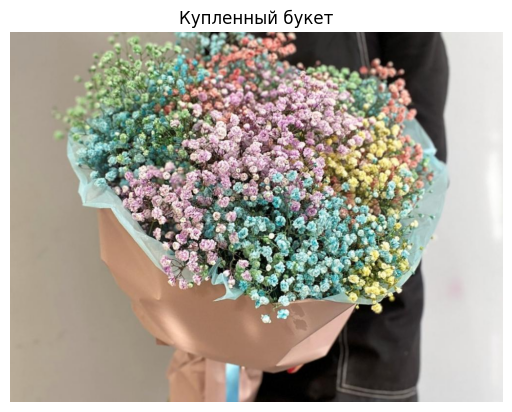

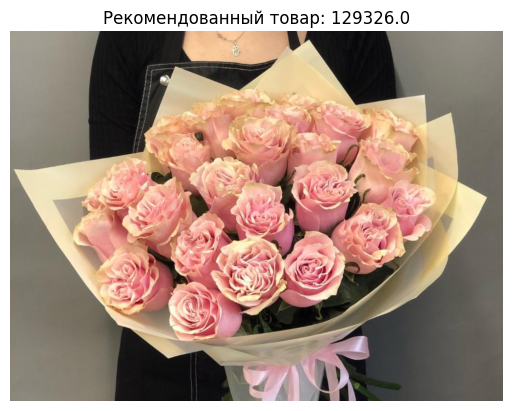

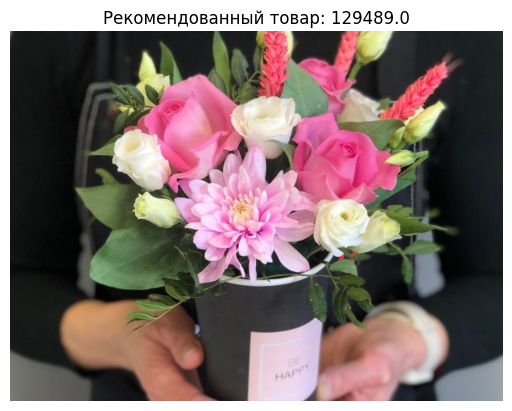

In [265]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Исключаем покупки сопутствующих товаров (например, nan) и дубликаты
df_colors1 = df_colors1.dropna(subset=['Товар'])  # Удаляем строки, где Товар = nan
df_colors1 = df_colors1.drop_duplicates(subset=['Товар', 'Заказчик'])  # Удаляем дубликаты

# Преобразование ID товаров и заказчиков в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Исправлено: используем параметр функции `customer_id`
    past_purchases = df[df['Заказчик'] == customer_id]
    displayed_images = set()  # Для отслеживания отображенных изображений
    for i, row in past_purchases.iterrows():
        img_filename = row['filename']
        if img_filename in displayed_images:
            continue
        displayed_images.add(img_filename)
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title('Купленный букет')
            plt.show()

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]['Товар'].unique()
    if len(purchased_products) == 0:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return
    for product_id in purchased_products:
        # Исправлено: рекомендуем товары для каждого купленного продукта отдельно
        recommend_products(product_id, df, cosine_sim, num_recommendations)

# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '866393.0'  # Пример ID заказчика 
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)


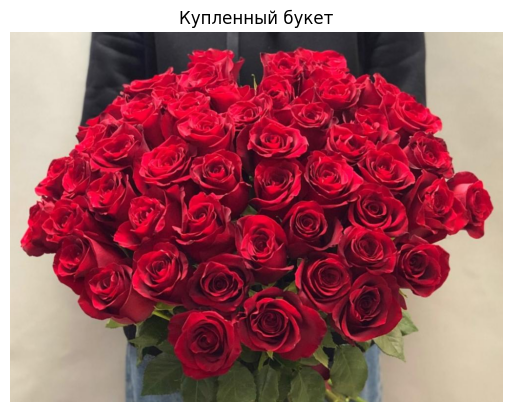

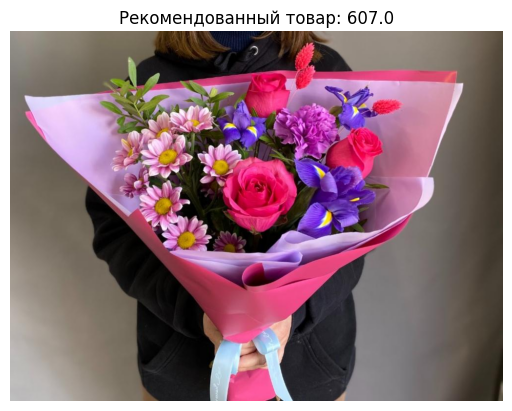

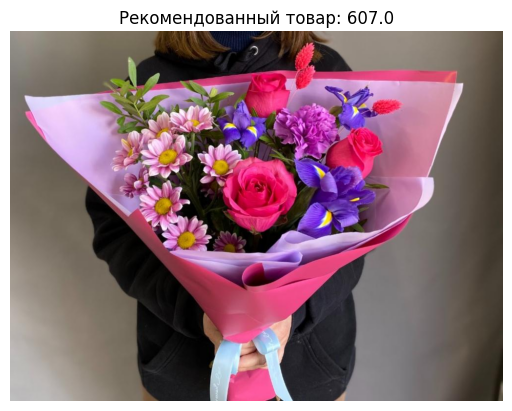

In [266]:
# Еще пример
# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '572347.0'  # Пример ID заказчика 
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)

In [ ]:
''''''df_colors1['Заказчик'] = df_colors1['Заказчик'].apply(lambda x: str(int(x)) if x == x else None)


In [ ]:
# flowers_app.py
from fastapi import FastAPI
from typing import Optional
from pydantic import BaseModel
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import os

app = FastAPI()

class CustomerRequest(BaseModel):
    customer_id: str
    num_recommendations: Optional[int] = 3

@app.post("/recommendations/")
async def get_recommendations(request: CustomerRequest):
    customer_id = request.customer_id
    num_recommendations = request.num_recommendations
    
# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Исключаем покупки сопутствующих товаров (например, nan) и дубликаты
df_colors1 = df_colors1.dropna(subset=['Товар'])  # Удаляем строки, где Товар = nan
df_colors1 = df_colors1.drop_duplicates(subset=['Товар', 'Заказчик'])  # Удаляем дубликаты

# Преобразование ID товаров и заказчиков в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Исправлено: используем параметр функции `customer_id`
    past_purchases = df[df['Заказчик'] == customer_id]
    displayed_images = set()  # Для отслеживания отображенных изображений
    for i, row in past_purchases.iterrows():
        img_filename = row['filename']
        if img_filename in displayed_images:
            continue
        displayed_images.add(img_filename)
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title('Купленный букет')
            plt.show()

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]['Товар'].unique()
    if len(purchased_products) == 0:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return
    for product_id in purchased_products:
        # Исправлено: рекомендуем товары для каждого купленного продукта отдельно
        recommend_products(product_id, df, cosine_sim, num_recommendations)

# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '866393.0'  # Пример ID заказчика 
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)
    # Mock response, replace with actual recommendation logic
    recommendations = [{"product_id": "12345", "similarity_score": 0.95}, {"product_id": "67890", "similarity_score": 0.93}]
    
    return {"customer_id": customer_id, "recommendations": recommendations}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)


In [ ]:
''''''# requirements.txt
''''''fastapi==0.68.0
uvicorn==0.15.0
pandas==1.3.3
pydantic==1.8.2
Pillow==8.3.1
matplotlib==3.4.2
numpy==1.21.2
scikit-learn==0.24.2'''

In [ ]:
@app.post("/recommendations/", response_model=RecommendationsResponse)
async def get_recommendations(request: CustomerRequest):
    df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')
    df_colors1 = df_colors1[df_colors1['Название категории'].notna() & ~df_colors1['Название категории'].isin(['СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ОТКРЫТКИ', 'ВОЗДУШНЫЕ ШАРЫ', 'СОБЕРИ БУКЕТ', 'ИГРУШКИ'])]
    df_colors1['Товар'] = df_colors1['Товар'].astype(str)
    df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)
    df_colors1 = df_colors1.drop_duplicates(subset=['Товар', 'Заказчик'])  # Удаляем дубликаты

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Исправлено: используем параметр функции `customer_id`
    past_purchases = df[df['Заказчик'] == customer_id]
    displayed_images = set()  # Для отслеживания отображенных изображений
    for i, row in past_purchases.iterrows():
        img_filename = row['filename']
        if img_filename in displayed_images:
            continue
        displayed_images.add(img_filename)
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title('Купленный букет')
            plt.show()

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]['Товар'].unique()
    if len(purchased_products) == 0:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return
    for product_id in purchased_products:
        # Исправлено: рекомендуем товары для каждого купленного продукта отдельно
        recommend_products(product_id, df, cosine_sim, num_recommendations)

# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '866393.0'  # Пример ID заказчика 
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)
    # Mock response, replace with actual recommendation logic
    recommendations = [{"product_id": "12345", "similarity_score": 0.95}, {"product_id": "67890", "similarity_score": 0.93}]
    
    return {"customer_id": customer_id, "recommendations": recommendations}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)



In [ ]:
'''''# рекомендациb
    recommendations = [Recommendation(product_id="123456", similarity_score=0.9, image_url="http://example.com/image1.jpg"),
                       Recommendation(product_id="456", similarity_score=0.8, image_url="http://example.com/image2.jpg")]
    
    return RecommendationsResponse(customer_id=request.customer_id, recommendations=recommendations)'''''


In [ ]:
''''''uvicorn main:app --reload


In [ ]:
# Привящка к просмотрам в яндекс-метрике
import requests

def send_event_to_metrica(counter_id, client_id, events):
    API_URL = "https://api-metrica.yandex.net/management/v1/counter/{counter_id}/logrequest"
    headers = {
        "Authorization": "OAuth <КЛЮЧ_API>"
    }
    data = {
        "requests": [{
            "client_id": client_id,
            "events": events
        }]
    }
    response = requests.post(API_URL.format(counter_id=counter_id), headers=headers, json=data)
    return response.json()


In [ ]:
# Шаблон для отправки по почте отчета о просмотрах для корректировки рекомендаций.
'''''import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(subject, body, to_addr, from_addr, smtp_server, smtp_port, login, password):
    msg = MIMEMultipart()
    msg['From'] = from_addr
    msg['To'] = to_addr
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(login, password)
    text = msg.as_string()
    server.sendmail(from_addr, to_addr, text)
    server.quit()

# Замените следующие значения на свои
subject = "Еженедельный отчет о рекомендациях"
body = "Здесь ваш отчет..."
to_addr = "example@example.com"
from_addr = "your_email@example.com"
smtp_server = "smtp.example.com"
smtp_port = 587
login = "your_email@example.com"
password = "your_password"

# Вызов функции для отправки отчета
send_email(subject, body, to_addr, from_addr, smtp_server, smtp_port, login, password)


In [ ]:
# закачка данных в базу данных sqlite
'''''import sqlite3
from datetime import datetime
import pandas as pd
import sqlite3

# Загрузка данных из CSV
df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Подключение к базе данных SQLite (будет создан файл базы данных, если он не существует)
conn = sqlite3.connect(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\flowers.db')

# Создание таблицы
conn.execute('''CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_date TEXT,
    customer_id TEXT,
    gender TEXT,
    order_type TEXT,
    delivery_time TEXT,
    total_cost REAL,
    order_status TEXT,
    product_id TEXT,
    product_name TEXT,
    category_name TEXT,
    image_link TEXT,
    product_cost REAL,
    quantity INTEGER,
    filename TEXT,
    color1 TEXT,
    color_name1 TEXT,
    color2 TEXT,
    color_name2 TEXT,
    color3 TEXT,
    color_name3 TEXT,
    color4 TEXT,
    color_name4 TEXT,
    color5 TEXT,
    color_name5 TEXT,
    color_result TEXT,
    all_colors TEXT
)''')

# Преобразование данных для вставки в таблицу
data_to_insert = df.to_records(index=False)

# Вставка данных
conn.executemany('''
INSERT INTO orders (order_date, customer_id, gender, order_type, delivery_time, total_cost, order_status, product_id, product_name, category_name, image_link, product_cost, quantity, filename, color1, color_name1, color2, color_name2, color3, color_name3, color4, color_name4, color5, color_name5, color_result, all_colors)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
''', data_to_insert)

# Закрытие соединения с базой данных
conn.commit()
conn.close()

print("Данные успешно загружены в базу данных.")

